#ANALISA DATA PENJUALAN E-COMMERCE

Group Project by: Fadhilah A. Khairogi, Putu Padmanaba, Falah R. Hibrizi, & A. Agung N. Putra

Pertanyaan Bisnis:
1. Bagaimana tren penjualan barang berdasarkan gender pembeli?
2. Bagaimana pengaruh usia terhadap unit price?
3. Bagai mana total penjualan tiap bulannya selama tahun 2023? apakah terjadi kenaikan atau penurunan?
4. Bagaimana rata-rata biaya pengiriman barang berdasarkan lokasi daerah?


##PREPORCESSING DATA

###Library yang digunakan untuk visualisasi data

In [ ]:
import pandas as pd # Untuk membaca excel / csv
import numpy as np # Untuk pengolahan array
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns # Untuk memperindah visualisasi data

###Source dataset

In [ ]:
#https://www.kaggle.com/datasets/refiaozturk/e-commerce-sales?resource=download

###Tabel data

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/realistic_e_commerce_sales_data.csv")
df.head(15)

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19
5,CUST0147,Male,North,64.0,Smartwatch,Wearables,200.0,2,400,11.26,In Transit,2023-01-11
6,CUST0262,Male,East,27.0,Smartwatch,Wearables,200.0,1,200,18.38,In Transit,2023-10-23
7,CUST0159,Female,South,18.0,Keyboard,Accessories,50.0,2,100,15.08,Returned,2023-06-15
8,CUST0046,Female,East,22.0,Mouse,Accessories,30.0,1,30,8.22,Returned,2023-02-25
9,CUST0023,Male,West,29.0,Headphones,Accessories,100.0,3,300,10.70,Delivered,2023-04-23


###Pengecekan data null

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Region,50
Age,100
Product Name,0
Category,0
Unit Price,0
Quantity,0
Total Price,0
Shipping Fee,0


###Pembersihan data null

In [ ]:
df['Region'].fillna(df['Region'].mode()[0], inplace=True)
df['Shipping Status'].fillna(df['Shipping Status'].mode()[0], inplace=True)

<ipython-input-5-51ef1e7c5824>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].fillna(df['Region'].mode()[0], inplace=True)
<ipython-input-5-51ef1e7c5824>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-6-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Region,0
Age,0
Product Name,0
Category,0
Unit Price,0
Quantity,0
Total Price,0
Shipping Fee,0


- Data null sudah dibersihkan dari kolom 'Region', 'Age', dan 'Shipping Status'

###Pengecekan data duplikat

In [ ]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


- Tidak terdapat data duplikat

###Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           1000 non-null   object 
 3   Age              1000 non-null   float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  1000 non-null   object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


- Data Kuantitatif kontinu: unit price, shipping fee, Total price
- Data Kuantitatif diskrit: Quantity, age

##VISUALISASI DATA

###Pairplot data kuantitatif

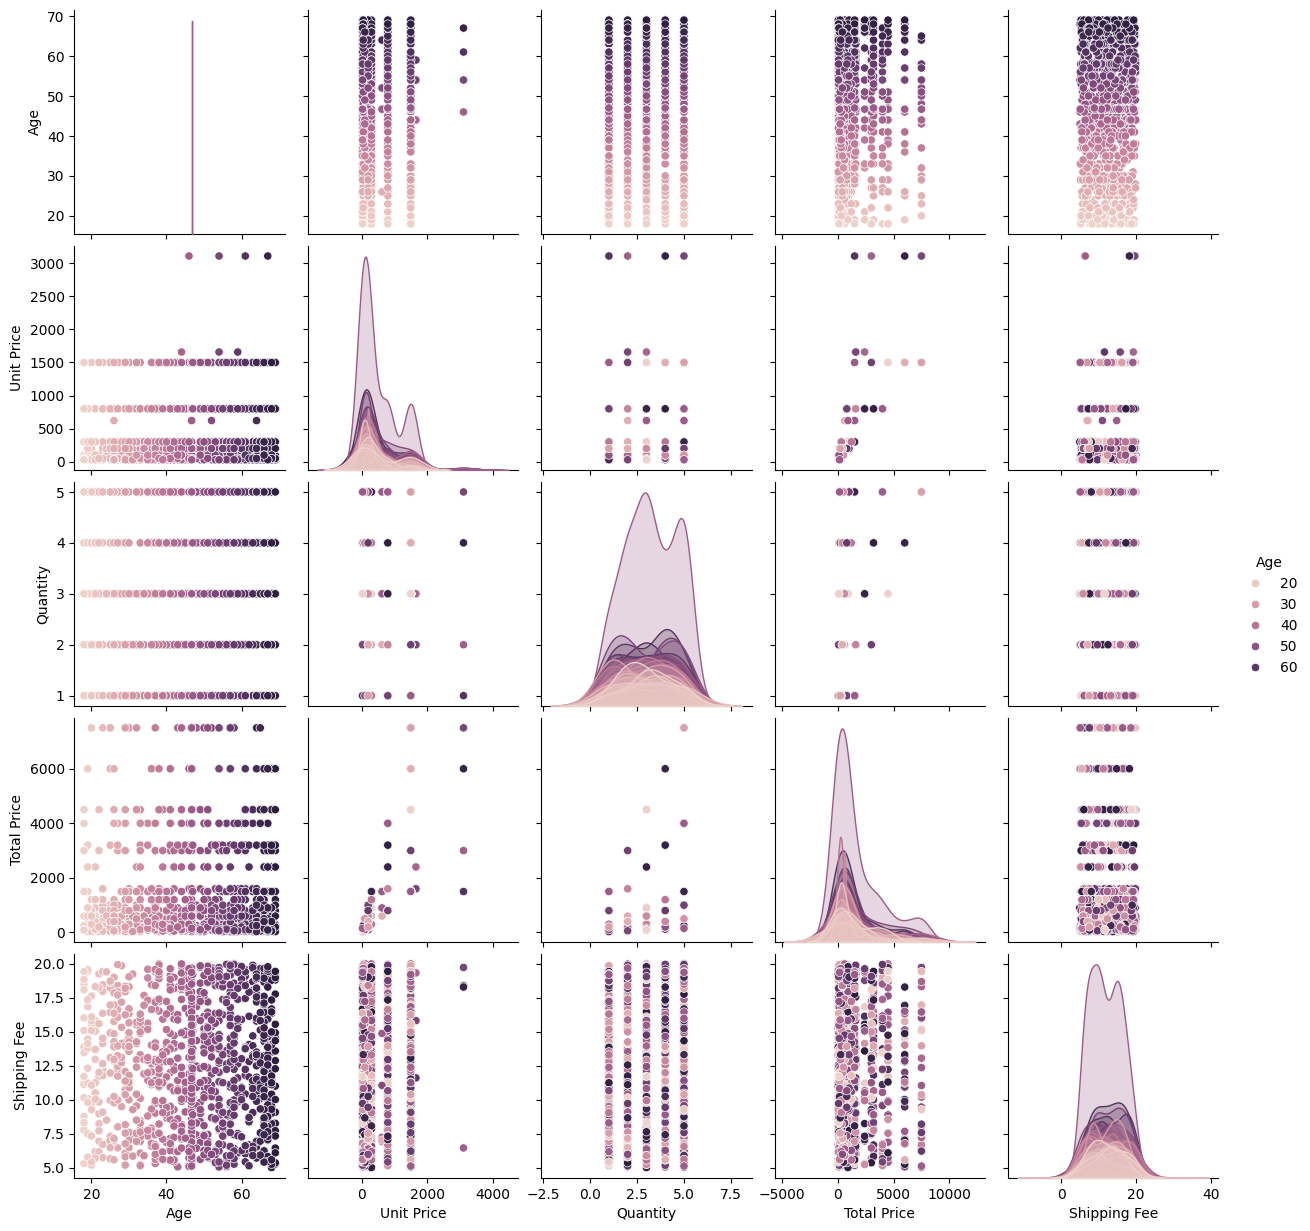

In [ ]:
sns.pairplot(df,
             vars=['Age','Unit Price',
            'Quantity','Total Price','Shipping Fee'],
            hue='Age')
plt.show()

###Statistik data

In [ ]:
print(df.describe())

               Age   Unit Price     Quantity  Total Price  Shipping Fee
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000
mean     46.695556   457.703777     3.008000  1346.600000     12.416390
std      14.240273   537.231434     1.404246  1834.037877      4.412185
min      18.000000    30.000000     1.000000    30.000000      5.000000
25%      37.000000    50.000000     2.000000   200.000000      8.560000
50%      46.695556   200.000000     3.000000   600.000000     12.315000
75%      58.000000   800.000000     4.000000  1500.000000     16.075000
max      69.000000  3109.560612     5.000000  7500.000000     19.980000


###Boxplot

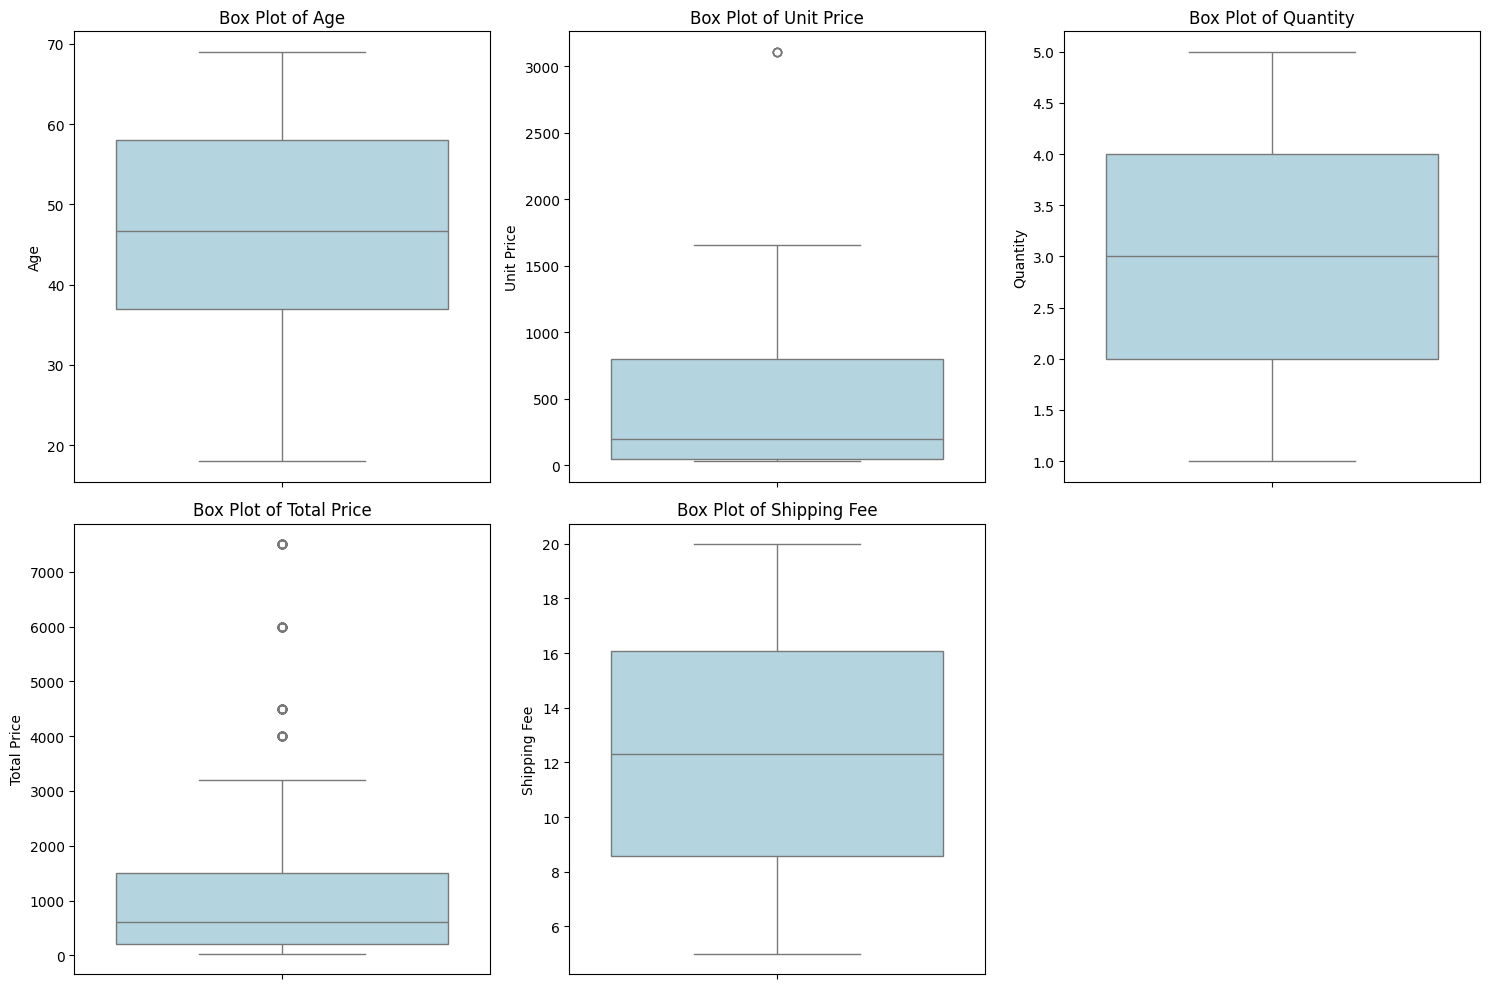

In [ ]:
columns_to_plot = ['Age', 'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee']


plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[column], color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

- positive skewness: Unit Price, Total Price
- negative skewness: Age
- Normal distribution: Quantity, Shipping Fee

In [ ]:
df_corr = df[['Age','Unit Price',
    'Quantity','Total Price','Shipping Fee']].dropna().corr()
df_corr

,Age,Unit Price,Quantity,Total Price,Shipping Fee
Age,1.000000,0.053865,0.013938,0.035913,0.025805
Unit Price,0.053865,1.000000,0.002678,0.824360,0.016851
Quantity,0.013938,0.002678,1.000000,0.360877,0.045812
Total Price,0.035913,0.824360,0.360877,1.000000,0.003249
Shipping Fee,0.025805,0.016851,0.045812,0.003249,1.000000


                   Age  Unit Price  Quantity  Total Price  Shipping Fee
Age           1.000000    0.053865  0.013938     0.035913      0.025805
Unit Price    0.053865    1.000000  0.002678     0.824360      0.016851
Quantity      0.013938    0.002678  1.000000     0.360877      0.045812
Total Price   0.035913    0.824360  0.360877     1.000000      0.003249
Shipping Fee  0.025805    0.016851  0.045812     0.003249      1.000000


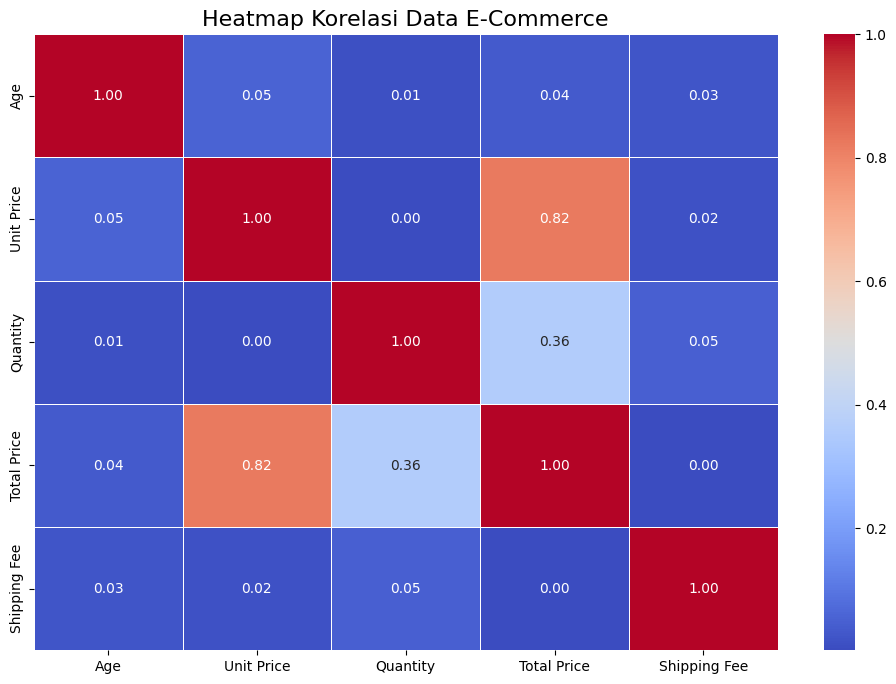

In [ ]:

 numeric_cols = ['Age', 'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee']

df_corr = df[numeric_cols].dropna().corr()
print(df_corr)


correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Data E-Commerce", fontsize=16)
plt.show()

##Bagaimana pengaruh usia terhadap unit price?

###Korelasi dan heatmap

In [ ]:
print("Statistik Deskriptif untuk Age:")
print(df['Age'].describe())
print("\nStatistik Deskriptif untuk Unit Price:")
print(df['Unit Price'].describe())

Statistik Deskriptif untuk Age:
count    1000.000000
mean       46.695556
std        14.240273
min        18.000000
25%        37.000000
50%        46.695556
75%        58.000000
max        69.000000
Name: Age, dtype: float64

Statistik Deskriptif untuk Unit Price:
count    1000.000000
mean      457.703777
std       537.231434
min        30.000000
25%        50.000000
50%       200.000000
75%       800.000000
max      3109.560612
Name: Unit Price, dtype: float64


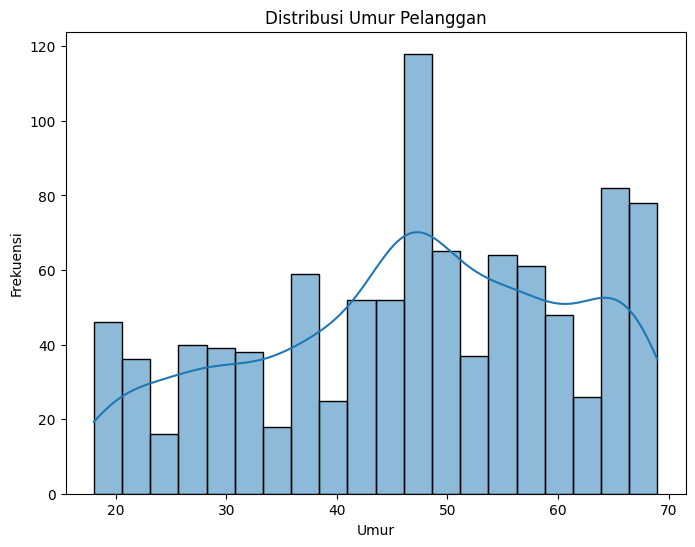

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()


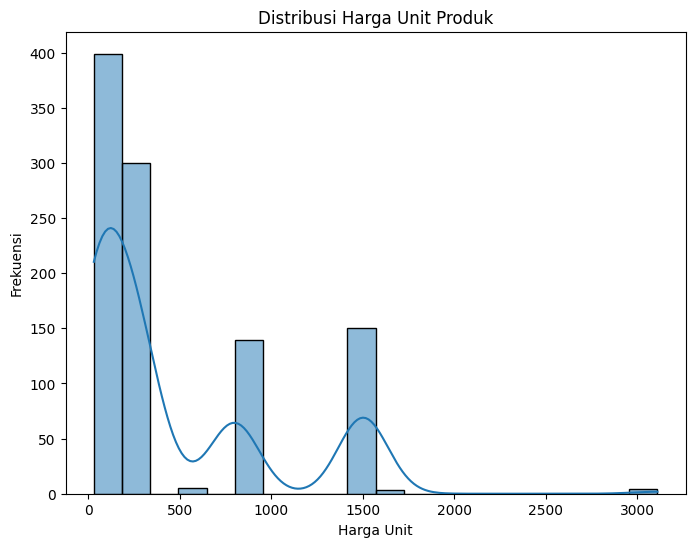

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Unit Price'], bins=20, kde=True)
plt.title('Distribusi Harga Unit Produk')
plt.xlabel('Harga Unit')
plt.ylabel('Frekuensi')
plt.show()


Persebaran data age dengan rentang umur 60-70 memiliki persebaran yang tinggi klo di bandingkan umur 20-40. Tpi, persebarannya cukup merata

Persebaran data unit price dengan rentang harga 0-500 atau harga murah itu memiliki persebaran yang tinggi. Ini mengartikan bahwa produk dengan harga yang murah sangat mendominasi kebanding harga yang menengah atau mahal

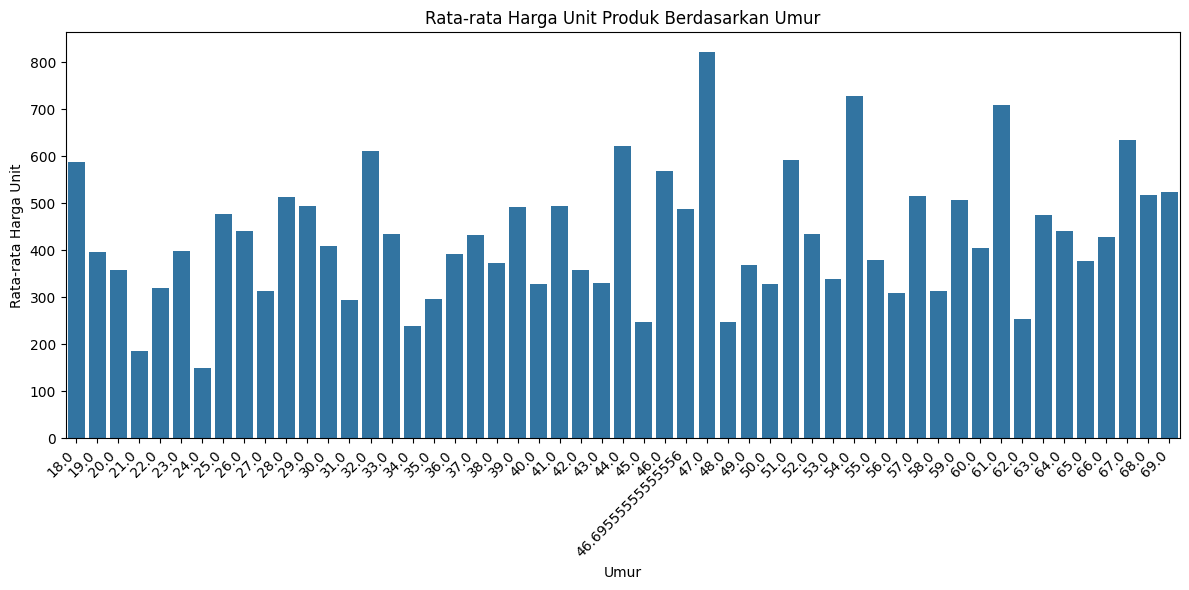

In [ ]:
age_unit_price = df.groupby('Age')['Unit Price'].mean().reset_index()

# Membuat diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Unit Price', data=age_unit_price)
plt.title('Rata-rata Harga Unit Produk Berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Rata-rata Harga Unit')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

In [ ]:
correlation = df['Age'].corr(df['Unit Price'])
print("\nKorelasi antara Age dan Unit Price:", correlation)



Korelasi antara Age dan Unit Price: 0.0538654475855235


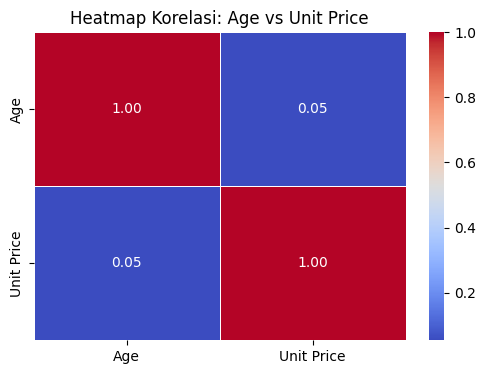

In [ ]:
df_corr = df[['Age', 'Unit Price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi: Age vs Unit Price", fontsize=12)
plt.show()



###Scatter Plot

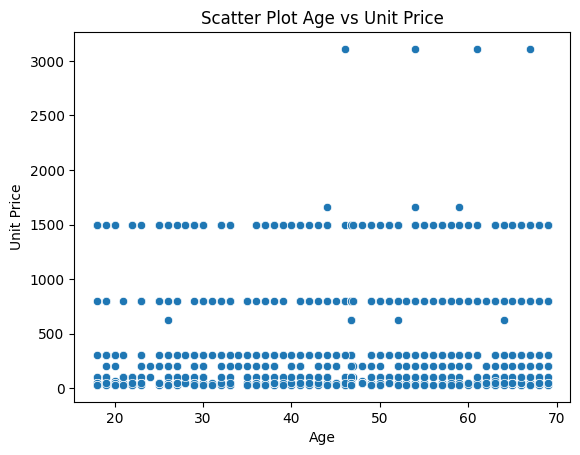

In [ ]:
sns.scatterplot(x='Age', y='Unit Price', data=df)
plt.title('Scatter Plot Age vs Unit Price')
plt.xlabel('Age')
plt.ylabel('Unit Price')
plt.show()

##Bagaimana tren Penjualan barang berdasarkan gender pembeli?

###Unit and total price plot

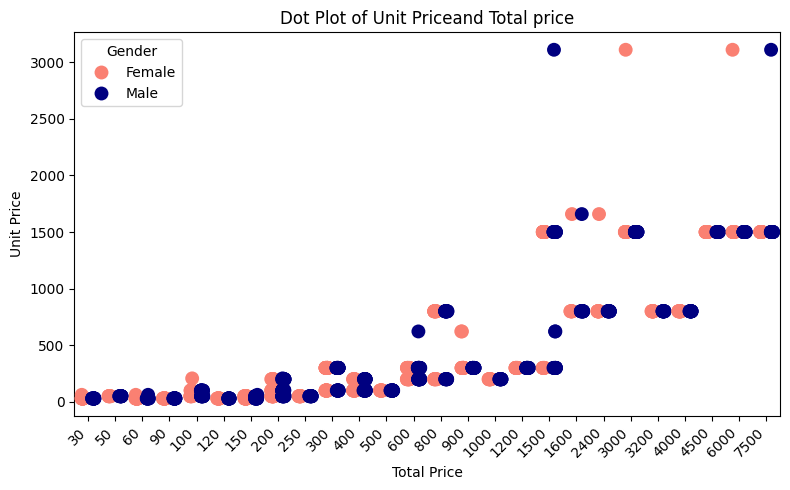

In [ ]:
#df['Custom Category'] = df['Gender'] + ' ' + df['Category']

plt.figure(figsize=(8, 5))


sns.stripplot(x='Total Price', y='Unit Price', hue='Gender', data=df, dodge=True, jitter=True,
              palette={'Female': 'salmon', 'Male': 'navy'}, size=10)

plt.title('Dot Plot of Unit Priceand Total price')
plt.xlabel('Total Price')
plt.ylabel('Unit Price')
plt.legend(title='Gender')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Harga barang yang dibeli oleh laki-laki dan perempuan cukup identik

###Category Pie Chart

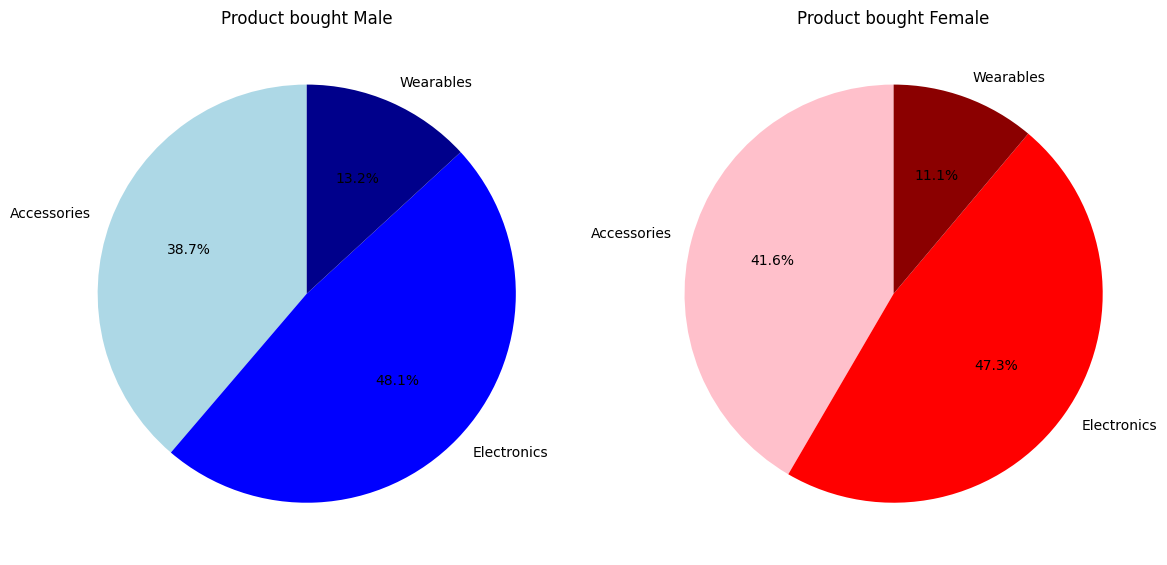

In [ ]:


def plot_sales_by_gender_and_category(df, gender, ax):

    filtered_df = df[df['Gender'] == gender]

    colors = ['lightblue', 'blue', 'darkblue']
    if gender == 'Male':
      colors = ['lightblue', 'blue', 'darkblue']
    else:
      colors = ['pink', 'red', 'darkred']

    sales_by_gender = filtered_df.groupby('Category').size().reset_index(name='Count')


    ax.pie(sales_by_gender['Count'], labels=sales_by_gender['Category'], autopct='%1.1f%%', startangle=90,colors=colors)

    ax.set_title(f'Product bought {gender}')


fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns


plot_sales_by_gender_and_category(df, 'Male', axs[0])
plot_sales_by_gender_and_category(df, 'Female', axs[1])


plt.tight_layout()
plt.show()

- Pada laki-laki dan perempuan, persebaran penjualan berdasarkan kategori cukup identik
- Barang elektronik menjadi kategori paling laris dengan ~47% penjualan

###Bar chart

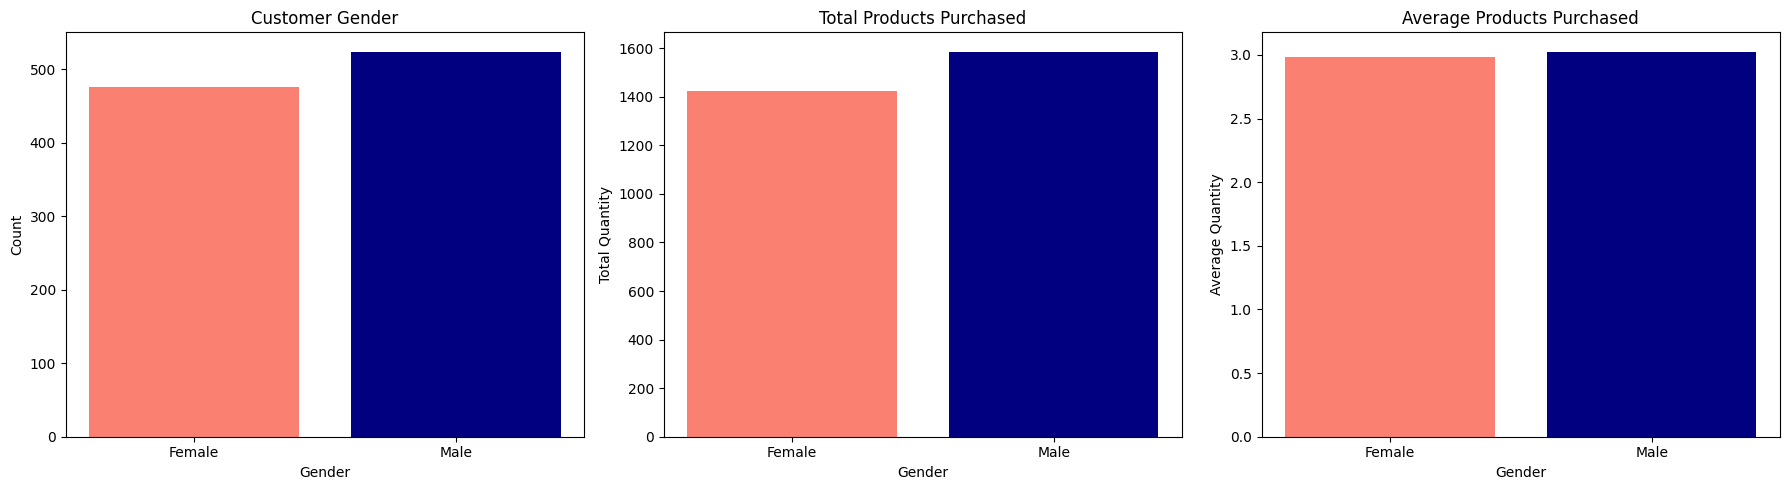

In [ ]:
male_count = df.query("Gender == 'Male'").shape[0]
female_count = df.query("Gender == 'Female'").shape[0]
total_products_by_gender = df.groupby('Gender')['Quantity'].sum().reset_index()
avg_quantity_by_gender = df.groupby('Gender')['Quantity'].mean().reset_index()


fig, axs = plt.subplots(1, 3, figsize=(18, 5))


gender_order = ['Female', 'Male']


gender_counts = df['Gender'].value_counts().reindex(gender_order)
axs[0].bar(gender_counts.index, gender_counts.values, color=['salmon', 'navy'])
axs[0].set_title('Customer Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].set_xticks(gender_counts.index)


total_products_by_gender = total_products_by_gender.set_index('Gender').reindex(gender_order)
axs[1].bar(total_products_by_gender.index, total_products_by_gender['Quantity'], color=['salmon', 'navy'])
axs[1].set_title('Total Products Purchased')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Total Quantity')
axs[1].set_xticks(total_products_by_gender.index)


avg_quantity_by_gender = avg_quantity_by_gender.set_index('Gender').reindex(gender_order)
axs[2].bar(avg_quantity_by_gender.index, avg_quantity_by_gender['Quantity'], color=['salmon', 'navy'])
axs[2].set_title('Average Products Purchased')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Average Quantity')
axs[2].set_xticks(avg_quantity_by_gender.index)


plt.tight_layout()
plt.show()

- Berdasarkan gender customer dan banyak produk, pembeli laki-laki sekitar ~10% lebih banyak dari perempuan
- Rata-rata pembeli membeli lebih dari 2 produk

###Gross revenue

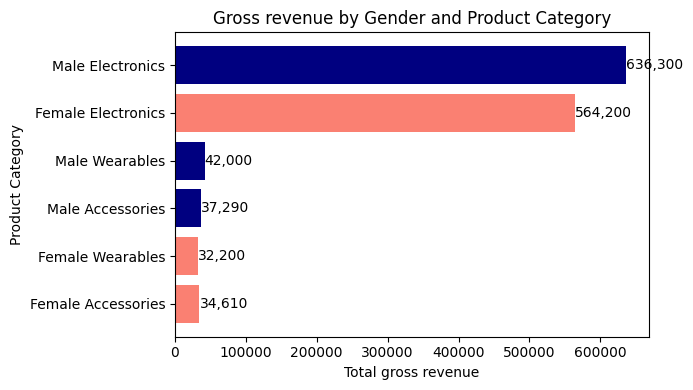


CATEGOTY WITH HIGHEST GROSS REVENUE: 636300 $


In [ ]:
total_price_female_accessories = df.query("Gender == 'Female' and Category == 'Accessories'")['Total Price'].sum()
total_price_female_wearables = df.query("Gender == 'Female' and Category == 'Wearables'")['Total Price'].sum()
total_price_female_electronics = df.query("Gender == 'Female' and Category == 'Electronics'")['Total Price'].sum()

total_price_male_accessories = df.query("Gender == 'Male' and Category == 'Accessories'")['Total Price'].sum()
total_price_male_wearables = df.query("Gender == 'Male' and Category == 'Wearables'")['Total Price'].sum()
total_price_male_electronics = df.query("Gender == 'Male' and Category == 'Electronics'")['Total Price'].sum()


categories = ['Female Accessories', 'Female Wearables',
              'Male Accessories', 'Male Wearables','Female Electronics', 'Male Electronics']
total_prices = [total_price_female_accessories, total_price_female_wearables,
                total_price_male_accessories, total_price_male_wearables,total_price_female_electronics, total_price_male_electronics]

plt.figure(figsize=(7, 4))
bars = plt.barh(categories, total_prices, color=['salmon', 'salmon', 'navy', 'navy', 'salmon', 'navy'])

plt.title('Gross revenue by Gender and Product Category')
plt.xlabel('Total gross revenue')
plt.ylabel('Product Category')

for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,d}', va='center', ha='left', fontsize=10)


plt.tight_layout()
plt.show()

print("\nCATEGOTY WITH HIGHEST GROSS REVENUE:",(max(total_prices)),"$")

- Pendapatan tertinggi berasal dari Male electronics dan female electronics
- Electronics menghasilkan lebih dari 80% pendapatan

## 3. Bagai mana total penjualan tiap bulannya selama tahun 2023? apakah terjadi kenaikan atau penurunan?

In [ ]:
category = ['Gender', 'Region', 'Product Name', 'Category', 'Shipping Status', 'Order Date']
numerical = ['Age', 'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee']

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      1000 non-null   object        
 1   Gender           1000 non-null   object        
 2   Region           1000 non-null   object        
 3   Age              1000 non-null   float64       
 4   Product Name     1000 non-null   object        
 5   Category         1000 non-null   object        
 6   Unit Price       1000 non-null   float64       
 7   Quantity         1000 non-null   int64         
 8   Total Price      1000 non-null   int64         
 9   Shipping Fee     1000 non-null   float64       
 10  Shipping Status  1000 non-null   object        
 11  Order Date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 93.9+ KB


<ipython-input-28-1e25bf4297ed>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_filtered['Total Price'].resample('M').sum()


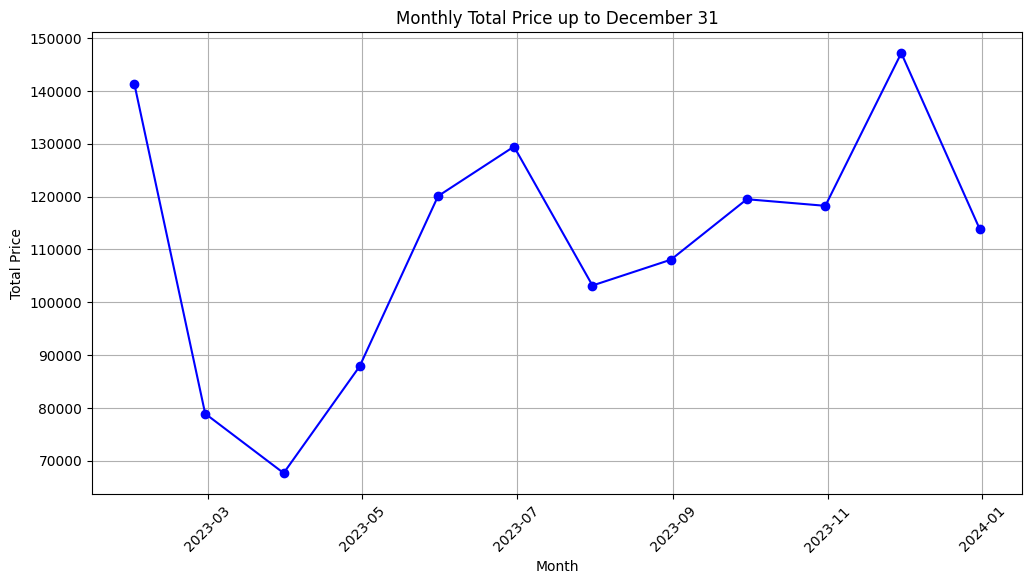

In [ ]:
# Set index ke 'Order Date' untuk memudahkan resampling
df.set_index('Order Date', inplace=True)

df_filtered = df[df.index <= '2023-12-31']

# Resample data untuk menghitung total bulanan dari 'Total Price'
monthly_sales = df_filtered['Total Price'].resample('M').sum()

# Plot data time series bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b')
plt.title('Monthly Total Price up to December 31')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Terjadi penurunan sementara di awal tahun, lalu total penjualan mengalami kenaikan bertahap di bulan-bulan berikutnya hingga pengunjung tahun 2023

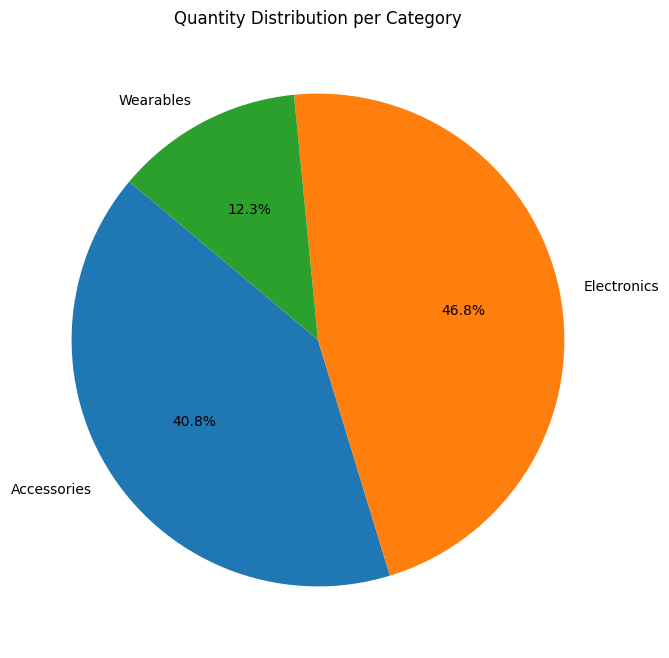

In [ ]:
# Menghitung total Quantity per kategori
category_quantity = df.groupby('Category')['Quantity'].sum()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%', startangle=140)
plt.title('Quantity Distribution per Category')
plt.show()

<ipython-input-30-13806469e8c9>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_per_category = df_filtered.groupby('Category')['Total Price'].resample('M').sum().unstack(level=0)


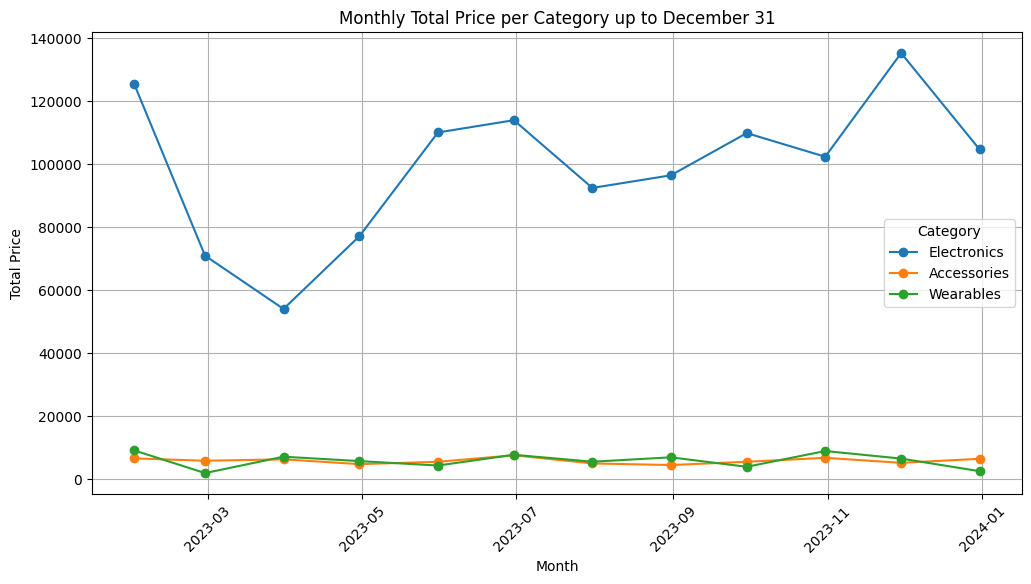

In [ ]:
# Resample data per kategori
categories = df_filtered['Category'].unique()
monthly_sales_per_category = df_filtered.groupby('Category')['Total Price'].resample('M').sum().unstack(level=0)

# Plot data time series bulanan untuk tiap kategori
plt.figure(figsize=(12, 6))
for category in categories:
    plt.plot(monthly_sales_per_category.index, monthly_sales_per_category[category], marker='o', label=category)

plt.title('Monthly Total Price per Category up to December 31')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid()
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


Terdapat gap besar antara total penjualan barang elektronik dengan barang aksesoris elektronik serta barang pakai. Mengapa bisa demikian?

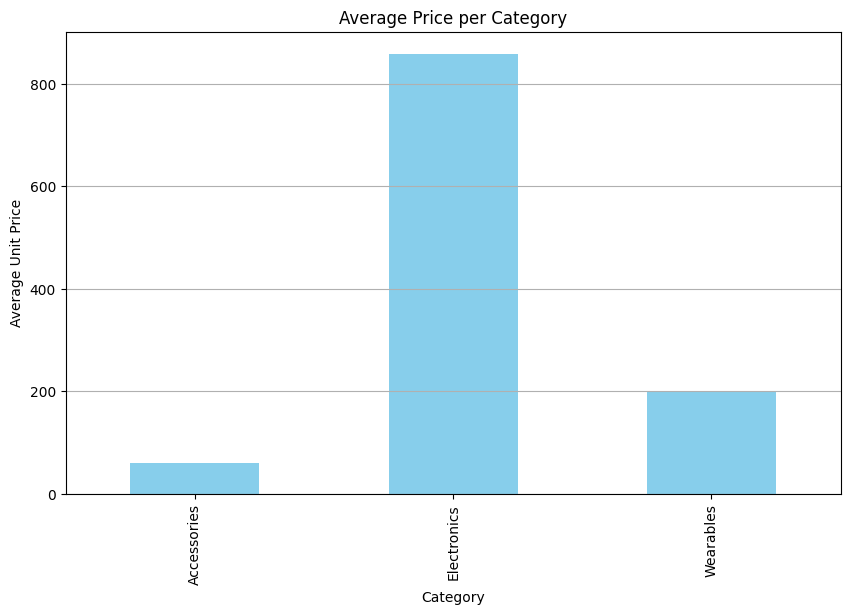

In [ ]:
# Menghitung rata-rata harga per kategori
average_price_per_category = df.groupby('Category')['Unit Price'].mean()

# Membuat bar plot untuk rata-rata harga per kategori
plt.figure(figsize=(10, 6))
average_price_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Unit Price')
plt.grid(axis='y')
plt.show()

Setelah dianalisa, ternyata penyebabnya adalah harga untuk barang elektronik lebih malah dibandingkan 2 kategori barang lainnya.

<ipython-input-32-b25354d77725>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_per_category = df_filtered.groupby('Category')['Total Price'].resample('M').sum().unstack(level=0)


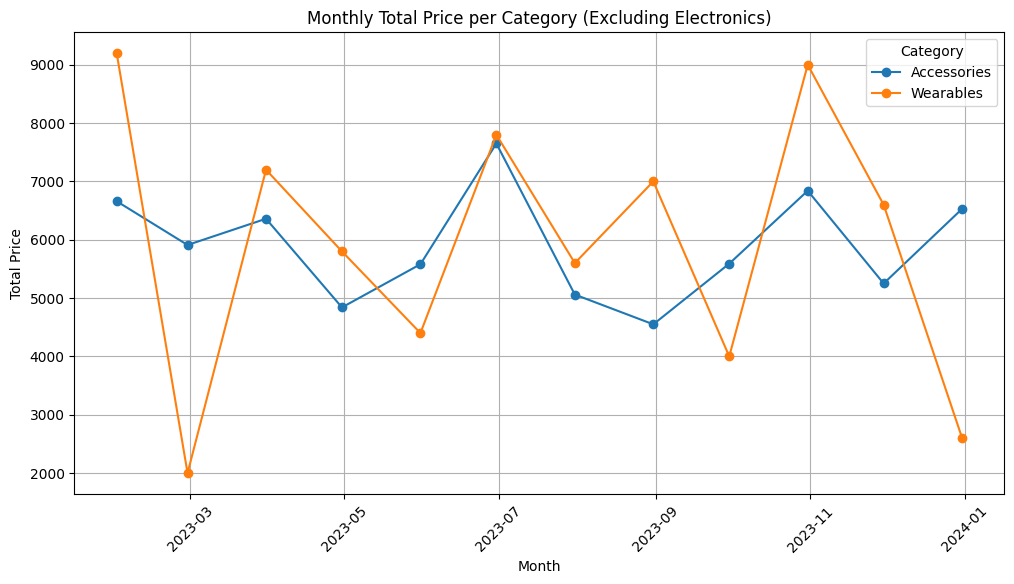

In [ ]:
categories = df_filtered['Category'].unique()
monthly_sales_per_category = df_filtered.groupby('Category')['Total Price'].resample('M').sum().unstack(level=0)

# Plot data time series bulanan untuk tiap kategori kecuali 'Electronics'
plt.figure(figsize=(12, 6))
for category in categories:
    if category != 'Electronics':
        plt.plot(monthly_sales_per_category.index, monthly_sales_per_category[category], marker='o', label=category)

plt.title('Monthly Total Price per Category (Excluding Electronics)')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid()
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()

### Kesimpulan pertanyaan 3:

Penjualan aksesoris terbilang stabil selama 1 tahun pada tahun 2023, sementara penjualan barang pakai terdapat penurunan di awal tahun dan akhir tahun, sementara terbilang lumayan stabil selama pertengahan tahun. Kenapa ada penurunan signifikan pada barang pakau di bulan maret dan di akhir tahun? Dibutuhkan data lebih lanjut mengenai ini.

asumsi sementara: maret turun karena akhir quartal 1, dimana orang2 sudah banyak spend uang di awal tahun. desember 2023 hingga januari 2024 turun karena orang2 sudah spend uang di november hingga awal desember(misal black friday dan winter sale)

#Bagaimana rata-rata biaya pengiriman barang berdasarkan lokasi daerah?

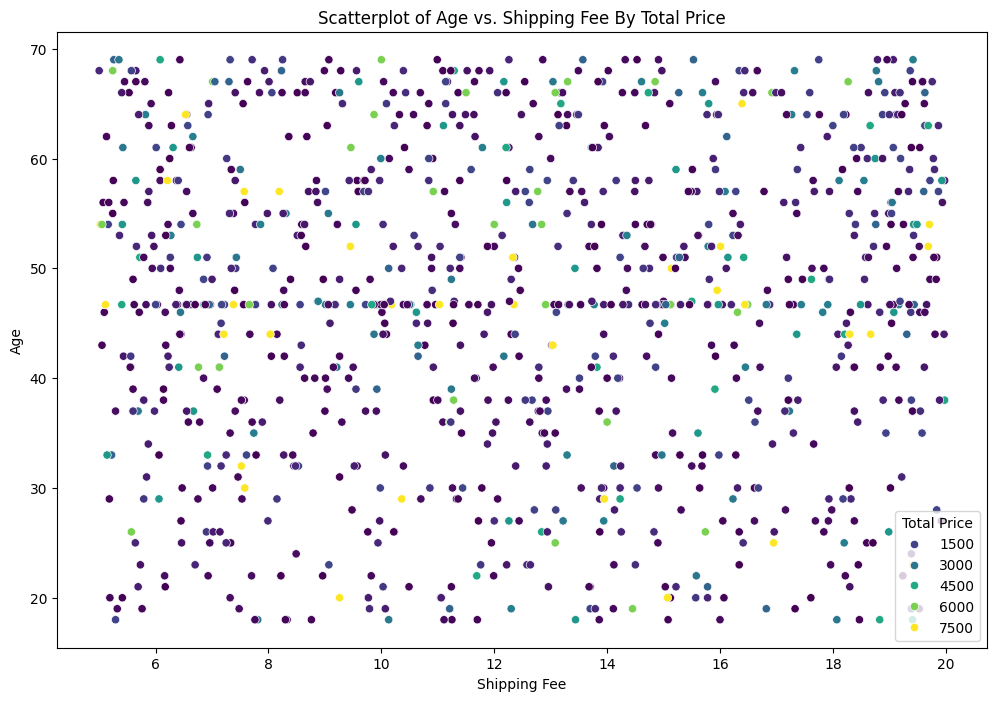

In [ ]:
plt.figure(figsize=(12, 8))
df_cleaned = df.dropna()
sns.scatterplot(
    x= df_cleaned['Shipping Fee'],
    y= df_cleaned['Age'],
    hue= df_cleaned['Total Price'],
    sizes=(20, 200),
    palette='viridis',
    data=df_cleaned,
)
plt.title('Scatterplot of Age vs. Shipping Fee By Total Price')
plt.show()

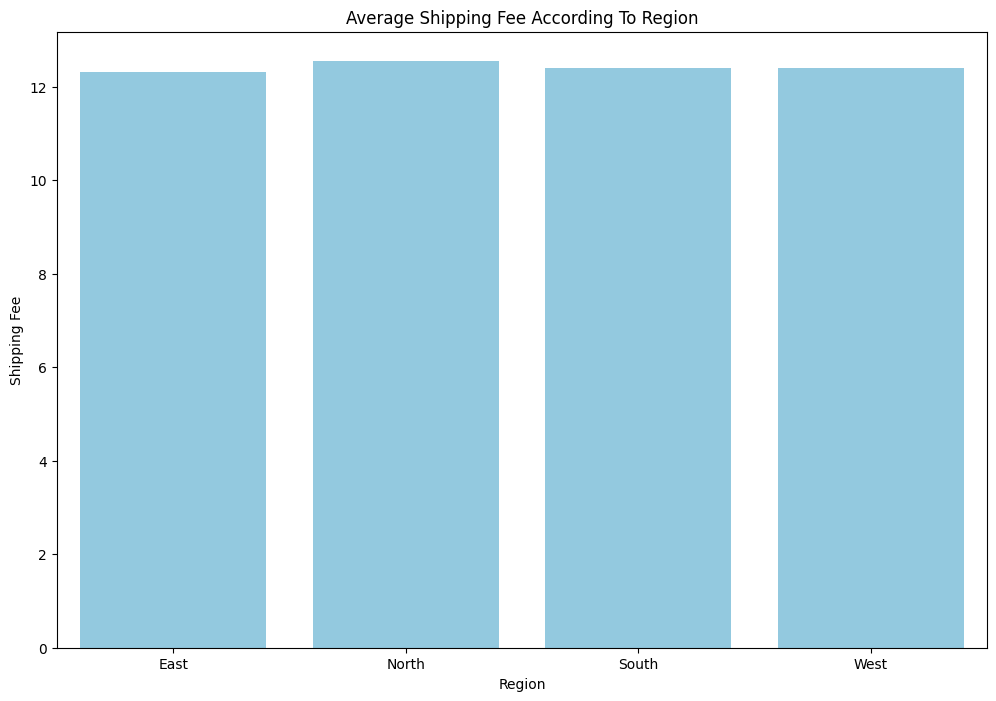

In [ ]:
plt.figure(figsize=(12, 8))
df_cleaned1 = df.dropna()
hasil = df_cleaned1.groupby('Region')['Shipping Fee'].mean().reset_index()
sns.barplot(
    x= hasil['Region'],
    y= hasil['Shipping Fee'],
    color= 'skyblue',
    data= hasil
)
plt.title('Average Shipping Fee According To Region')
plt.xlabel('Region')
plt.ylabel('Shipping Fee')

plt.show()

##HASIL ANALISA DATA

1. Berdasarkan jumlah pembeli, banyaknya produk, dan total harga penjualan, penjualan barang didominasi oleh laki-laki. Preferensi produk yang dibeli cenderung sama antara pria dan wanita, dengan produk paling banyak terjual adalah elektronik. Produk elektronik menghasilkan 88% pendapatan kotor atau sebesar 927000$.
2. Dari visualisasi data, scatter plot dan histogram tidak membuat pola apapunn seperti menaik atau menurun, persebarannya acak. Jadi, diasumsikan kalau Umur pelanggan tidak berpengaruh signifikan terhadap unit price.
3. Penjualan aksesoris terbilang stabil selama 1 tahun pada tahun 2023, sementara penjualan barang pakai terdapat penurunan di awal tahun dan akhir tahun, sementara terbilang lumayan stabil selama pertengahan tahun. Kenapa ada penurunan signifikan pada barang pakau di bulan maret dan di akhir tahun? Dibutuhkan data lebih lanjut mengenai ini. Asumsi sementara: maret turun karena akhir quartal 1, dimana orang2 sudah banyak spend uang di awal tahun. desember 2023 hingga januari 2024 turun karena orang2 sudah spend uang di november hingga awal desember(misal black friday dan winter sale)
4. Berdasarkan hasil barplot diatas, terbukti bahwa setiap daerah memiliki rata-rata biaya pengiriman sekitar 12 dengan rata-rata tertinggi terletak pada South yaitu 12.601579 dan rata-rata terenda terletak pada East yaitu 12.236134.